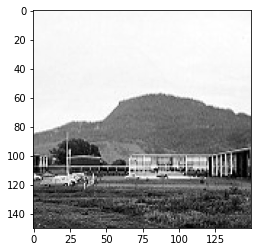

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

# D:\Chrome Downloads\kaggleDatasetForProject\seg_train\seg_train\buildings
DATADIR = "D:\Chrome Downloads\kaggleDatasetForProject\seg_train\seg_train"
CATEGORIES = ["buildings", "forest", "glacier","mountain", "sea", "street"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

    plt.imshow(img_array,cmap = "gray")
    plt.show()
    break
  break